<a href="https://colab.research.google.com/github/immisius/Advanced-Machine-Learning/blob/main/Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

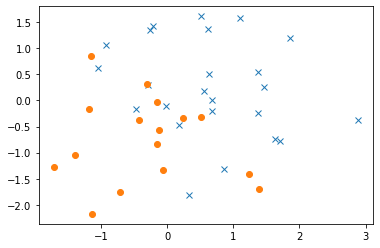

In [1]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

In [2]:
def hinge(w):
  res=lam*(w.T@w).item()
  for i in range(len(x)):
    res+=max(0,1-y[i]*w.T@x[i])
  return res

In [3]:
def dual_L(a):
  return  (-1/(4*lam)*a.T@K@a+sum(a)).squeeze().item()

In [4]:
def n_dual_L(a):
  return -dual_L(a)

In [5]:
a=np.full([x.shape[0],1],0)
lam=5
yTx=np.array([y,y]).T*x
K=yTx@yTx.T
eta=1/max(np.real(np.linalg.eig(2*K)[0]))
dualL=[]
hinge_hist=[]
while True:
  new_a=a-eta*(1/(2*lam)*K@a-np.ones([len(a),1]))
  for i in range(len(new_a)):
    if new_a[i] >= 1:
      new_a[i]=1
    if new_a[i]<0:
      new_a[i]=0
  dualL.append(dual_L(a))
  w=np.zeros(x.shape[1])
  for i in range(len(x)):
    w+=a[i]*y[i]*x[i]
  w/=2*lam
  hinge_hist.append(hinge(w.T))
  if abs(n_dual_L(a)-n_dual_L(new_a))<=1e-2:
    break
  a=new_a

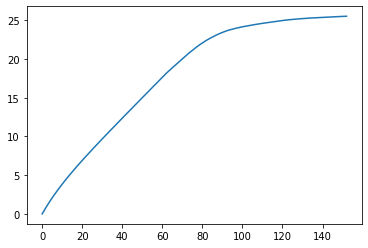

In [6]:
plt.plot(dualL)

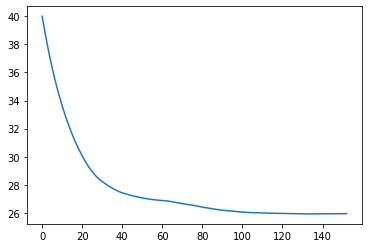

In [7]:
plt.plot(hinge_hist)

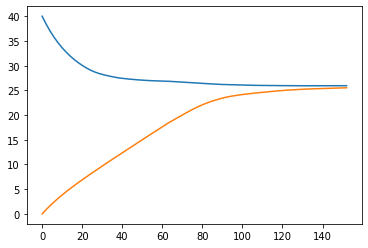

In [8]:
plt.plot(hinge_hist)
plt.plot(dualL)